In [1]:
import sys
assert sys.version_info >= (3, 5)

In [2]:
import sklearn
assert sklearn.__version__ > "0.2"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import os
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'Chapter 9'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Clustering

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Figure 9-1. Classification(Left) vs Clustering(Right)

Saving figure classification_vs_clustering_plot


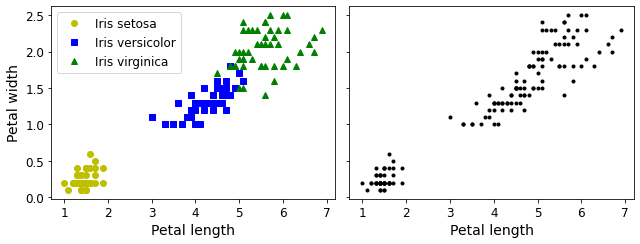

In [7]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], 'yo' ,label='Iris setosa')
plt.plot(X[y==1, 2], X[y==1, 3], 'bs' ,label='Iris versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], 'g^' ,label='Iris virginica')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='upper left', fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c='k', marker='.')
plt.xlabel('Petal length', fontsize=14)
plt.tick_params(labelleft=False) # y축 눈금값 제거

save_fig('classification_vs_clustering_plot')
plt.show()

In [8]:
# Gaussian mixture model can actually separate these clusters pretty well
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [9]:
y_pred = gm.predict(X)

In [10]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id
    
mapping

{2: 0, 0: 1, 1: 2}

In [11]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

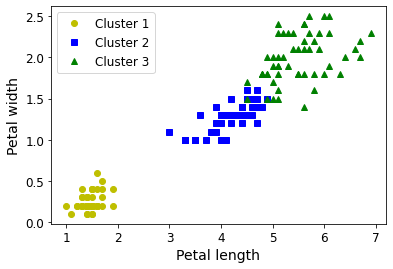

In [12]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], 'yo', label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], 'bs', label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], 'g^', label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [13]:
np.sum(y_pred==y)

145

In [14]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

# K-Means

In [15]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [16]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

#### Figure 9-2. 샘플 덩어리 5개로 이루어진 Label이 없는 Dataset

In [17]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', rotation=0, fontsize=14)

Saving figure blobs_plot


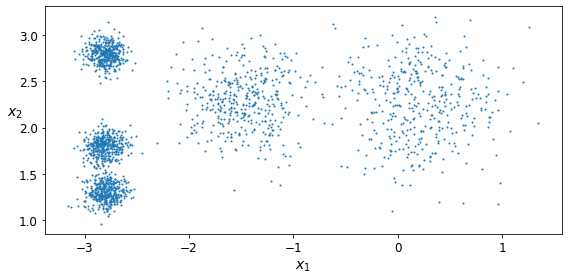

In [18]:
plt.figure(figsize=(8, 4))

plot_clusters(X)

save_fig("blobs_plot")
plt.show()

In [19]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [20]:
y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [21]:
y_pred is kmeans.labels_

True

In [22]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [23]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

In [24]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

#### Figure 9-3. Decision Boundaries of K-means (Voronoi tessellation)

In [25]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.',markersize=2)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0, fontsize=14)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


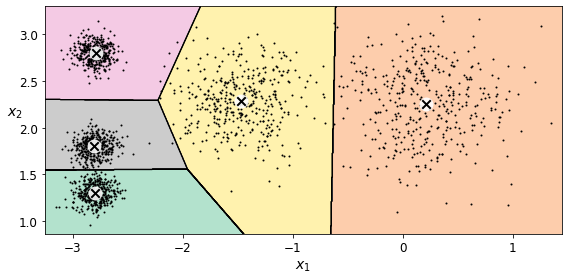

In [26]:
plt.figure(figsize=(8, 4))

plot_decision_boundaries(kmeans, X)

save_fig("voronoi_plot")
plt.show()

#### Hard Clustering vs Soft Clustering

In [27]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

In [28]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

## K-Means Algorithm

#### Figure 9-4. K-means Alogorithm

In [29]:
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1,
                     algorithm='full', max_iter=1, random_state=15)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1,
                     algorithm='full', max_iter=2, random_state=15)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1,
                     algorithm='full', max_iter=3, random_state=15)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=15)

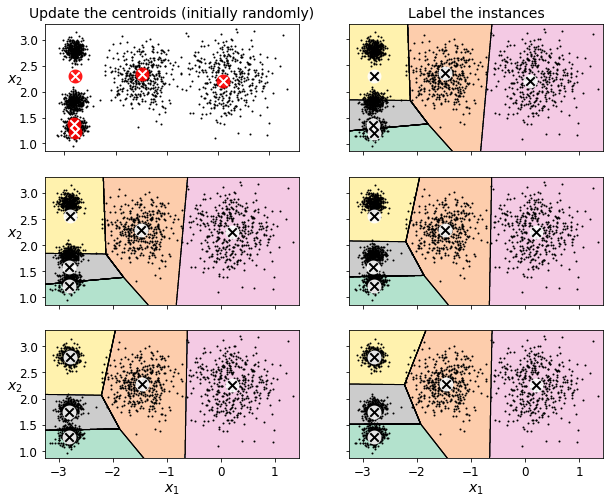

In [30]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel('$x_2$', rotation=0, fontsize=14)
plt.tick_params(labelbottom=False)
plt.title('Update the centroids (initially randomly)', fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Label the instances', fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

# save_fig("kmeans_algorithm_plot")
plt.show()

#### K-means Variability

#### Figure 9-6. 운 나쁜 Centroid 초기화 때문에 만들어진 Non-Optimal Solution

In [31]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
        
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_plot


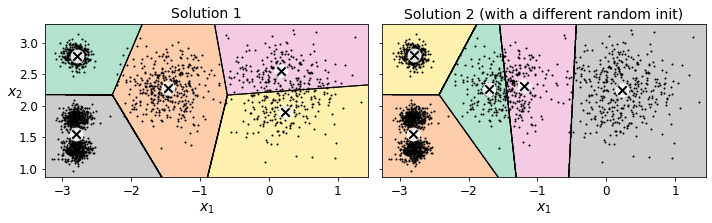

In [32]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init='random', n_init=1,
                         algorithm='full', random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init='random', n_init=1,
                         algorithm='full', random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                         'Solution 1', 'Solution 2 (with a different random init)')
save_fig('kmeans_variability_plot')
plt.show()

### Inertia

In [33]:
# To select the best model, evaluate a K-Means model's performance
kmeans.inertia_

211.5985372581683

In [34]:
# inertia is the sum of the squared distances between each training instance and its cloest centroid
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816834

In [35]:
# 예측기의 score()는 Scikit-learn의 '큰 값이 좋은 것이다'라는 규칙을 따라야 하기 때문에 inertia으 음숫값을 반환한다.
kmeans.score(X)

-211.59853725816825

### Multiple Initializations

In [36]:
kmeans_rnd_init1.inertia_

219.8438540223319

In [37]:
kmeans_rnd_init2.inertia_

236.95563196978733

In [38]:
kmeans_rnd_10_inits= KMeans(n_clusters=5, init='random', algorithm='full', random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

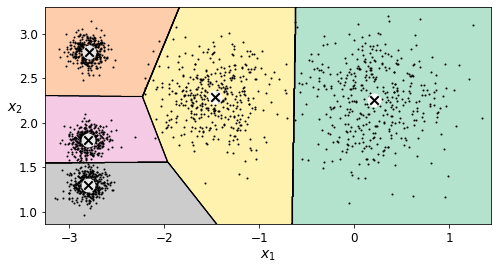

In [39]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

## Centroid initialization methods

In [40]:
KMeans()

KMeans()

In [41]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.62337889822362

## Accelerated K-Means

In [42]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [43]:
minibatch_kmeans.inertia_

211.93186531476786

In [44]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=42)

In [46]:
# if use memmap(if file is large)
filename = 'my_mnist.data'
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [47]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

In [48]:
# if cannot use memmap(the larger file)
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [49]:
np.random.seed(42)

In [50]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)
    
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
            
    if (best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [51]:
best_kmeans.score(X)

-211.70999744411446

Minibatch K-Means is much faster than regular K-Means

In [52]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

37.9 ms ± 858 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

20.3 ms ± 759 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
from timeit import timeit

In [55]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print(f"\r{k}/{100}", end='')
    times[k-1, 0] = timeit('kmeans_.fit(X)', number=10, globals=globals())
    times[k-1, 1] = timeit('minibatch_kmeans.fit(X)', number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

#### Figure 9-6 Minibatch K-menas의 Inertia가 K-means보다 높다.(Left) & 하지만 훨씬 빠르고 k가 증가할수록 더 그렇다.(Right)

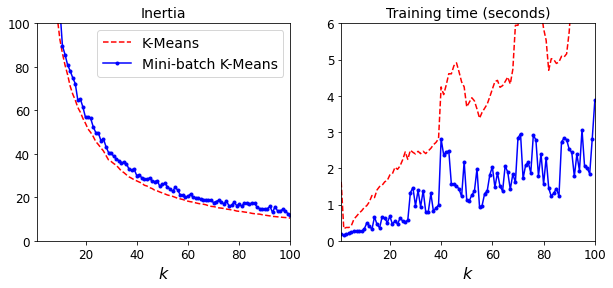

In [56]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], 'r--', label='K-Means')
plt.plot(range(1, 101), inertias[:, 1], 'b.-', label='Mini-batch K-Means')
plt.xlabel("$k$", fontsize=16)
plt.title('Inertia', fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], 'r--', label='K-Means')
plt.plot(range(1, 101), times[:, 1], 'b.-', label='Mini-batch K-Means')
plt.xlabel('$k$', fontsize=16)
plt.title('Training time (seconds)', fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

## Finding the optimal number of clusters

#### Figure 9-7. 잘못된 Cluster 개수 선택 : k가 너무 작으면 별개의 Cluster를 합치고(Left), k가 너무 크면 하나의 Cluster가 여러 개로 나뉜다.(Right)

Saving figure bad_n_clusters_plot


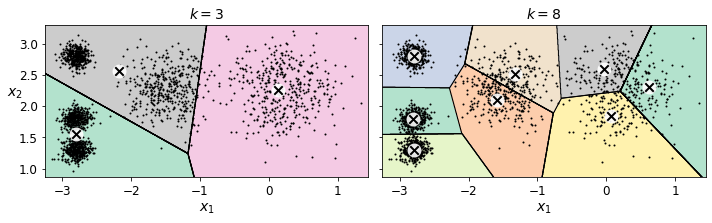

In [57]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, '$k=3$', '$k=8$')

save_fig('bad_n_clusters_plot')
plt.show()

In [58]:
kmeans_k3.inertia_

653.2223267580945

In [59]:
kmeans_k8.inertia_

118.44108623570085

In [60]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

#### Figure 9-8. Inertia Graph를  Cluster의 개수 k의 함수로 그렸을 때 그래프가 꺾이는 지점을 Elbow라고 부른다.

Saving figure inertia_vs_k_plot


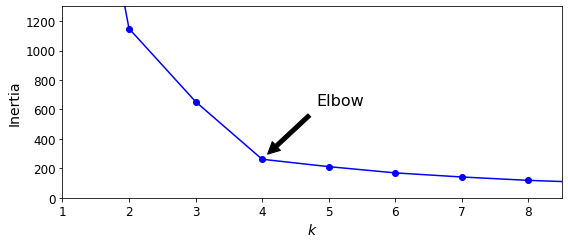

In [61]:
plt.figure(figsize=(8, 3.5))

plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
            xy=(4, inertias[3]),
            xytext=(0.55, 0.55),
            textcoords='figure fraction',
            fontsize=16,
            arrowprops = dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])

save_fig('inertia_vs_k_plot')
plt.show()

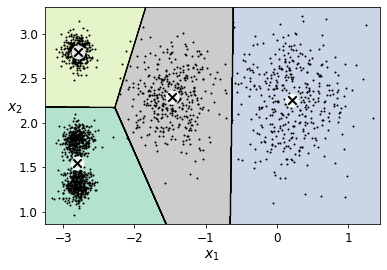

In [62]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [63]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

In [64]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

#### Figure 9-9. Silhouette score를 사용해 Cluster 개수 k 선택하기

Saving figure silhouette_score_vs_k_plot


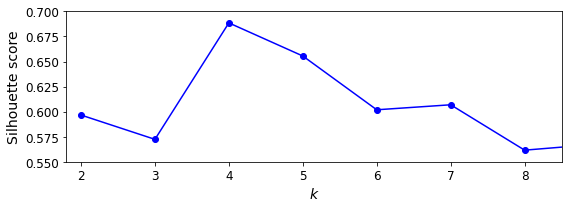

In [65]:
plt.figure(figsize=(8, 3))

plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

save_fig('silhouette_score_vs_k_plot')
plt.show()

#### Figure 9-10. 여러가지 k값에 대한 Silhouette Diagram 분석

Saving figure silhouette_analysis_plot


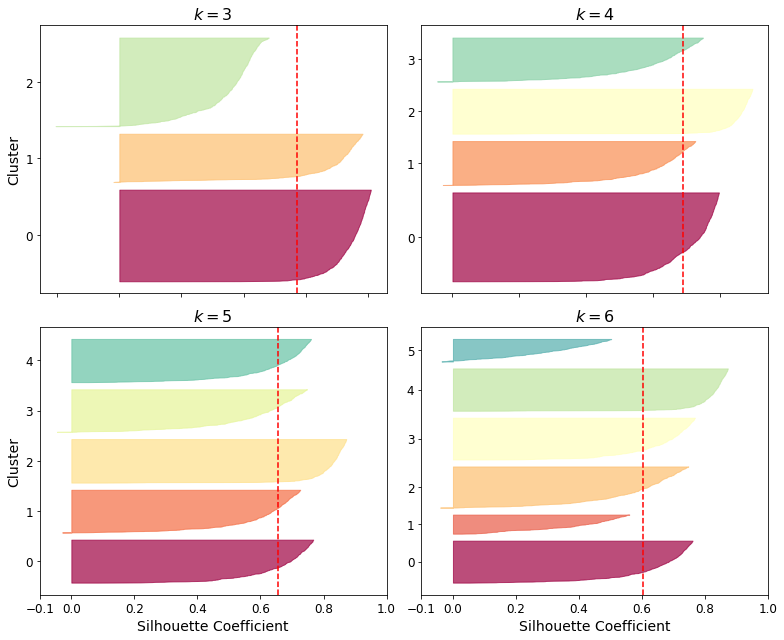

In [66]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in range(3, 7):
    plt.subplot(2, 2, k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title(f"$k={k}$", fontsize=16)
    
save_fig('silhouette_analysis_plot')
plt.show()

# Limits of K-Means

In [67]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

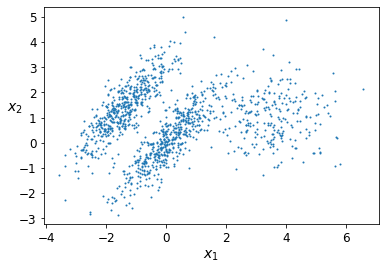

In [68]:
plot_clusters(X)

In [69]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_good.fit(X)

KMeans(init=array([[-1.5,  2.5],
       [ 0.5,  0. ],
       [ 4. ,  0. ]]),
       n_clusters=3, n_init=1, random_state=42)

In [70]:
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

#### Figure 9-11. K-means는 3개의 타원형 Cluster를 적절히 구분하지 못한다.

Saving figure bad_kmeans_plot


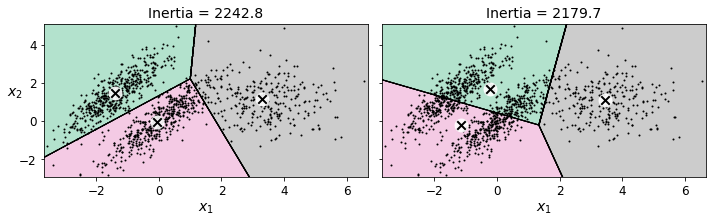

In [71]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f'Inertia = {kmeans_good.inertia_:.1f}', fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}", fontsize=14)

save_fig('bad_kmeans_plot')
plt.show()

## Using Clustering for Image Segmentation

In [72]:
# Download ladybug image
DOWNLOAD_ROOT = r"https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = 'ladybug.png'
print('Downloading', filename)
url = DOWNLOAD_ROOT + 'images/unsupervised_learning/' + filename
urllib.request.urlretrieve(url, os.path.join(IMAGES_PATH, filename))

('.\\images\\Chapter 9\\ladybug.png',
 <http.client.HTTPMessage at 0x1b2cc8e2d90>)

In [73]:
from matplotlib.image import imread
image = imread(os.path.join(IMAGES_PATH, filename))
image.shape

(533, 800, 3)

In [74]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

In [75]:
segmented_images = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_images.append(segmented_image.reshape(image.shape))

#### Figure 9-12. 다양한 Cluster 개수로 K-means를 사용해 만든 Image Segmentation

Saving figure image_segmentation_diagram


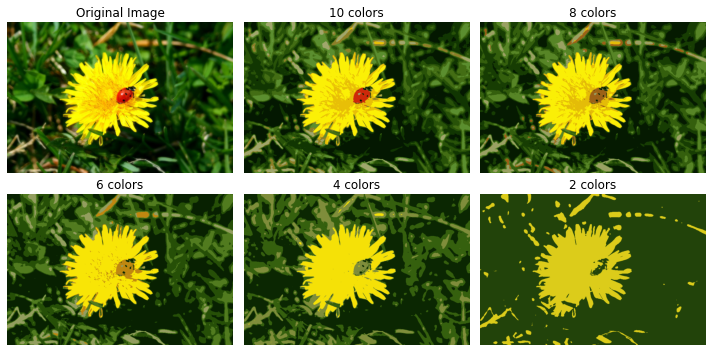

In [76]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_images[idx])
    plt.title(f'{n_clusters} colors')
    plt.axis('off')
    
save_fig('image_segmentation_diagram')
plt.show()

## Using Clustering for Preprocessing

In [77]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [79]:
from sklearn.linear_model import LogisticRegression

# If the option chosen is ‘ovr’, then a binary problem is fit for each label.
lr_reg = LogisticRegression(multi_class='ovr', max_iter=5000, random_state=42)
lr_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [80]:
lr_reg_score = lr_reg.score(X_test, y_test)
lr_reg_score

0.9688888888888889

In [81]:
from sklearn.pipeline import Pipeline

# K-means를 전처리로 사용
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=42)),
    ('lr_reg', LogisticRegression(multi_class='ovr', max_iter=5000, random_state=42))
])
    
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('lr_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [82]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.98

In [83]:
# 오차율 42% 감소
1 - (1 - pipeline_score) / (1 - lr_reg_score)

0.3571428571428561

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=21, total=   4.7s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   4.6s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   4.9s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   4.6s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   4.6s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   4.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   4.0s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   3.9s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   4.4s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   4.0s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   4.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   4.0s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   4.0s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   4.4s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   6.7s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   6.2s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   6.6s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   6.9s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   5.7s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   6.0s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   5.8s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=   6.5s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   6.0s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   7.9s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   6.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   6.1s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   7.4s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   6.8s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   6.7s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   6.5s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   7.0s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 21.5min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('lr_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [85]:
# best number of cluster K 
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [86]:
grid_clf.score(X_test, y_test)

0.98

## Using Clustering for Semi-Supervised Learning
준지도학습 -> 레이블이 없는 샘플이 많고 / 레이블이 있는 샘플이 적을 때

In [87]:
n_labeled = 50

In [88]:
lr_reg = LogisticRegression(multi_class='ovr', random_state=42)
lr_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
lr_reg.score(X_test, y_test)

0.8333333333333334

In [89]:
# 성능 향상 방법 => Train set을 50개로 Clusteirng한 후
# 각 cluster에서 centroid에 가장 가까운 Image를 찾는다.(argmin 사용 이유)
# 이를 대표 Image로 정의
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

#### Figure 9-13. 50개의 대표 MNIST Image (Cluster당 한 개)

Saving figure representative_images_diagram


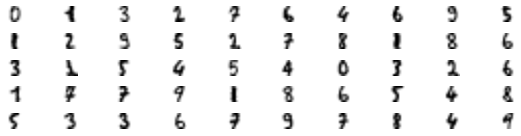

In [90]:
plt.figure(figsize=(8, 2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k//10, 10, index+1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap='binary', interpolation='bilinear')
    plt.axis('off')
    
save_fig('representative_images_diagram')
plt.show()

In [91]:
y_train[representative_digit_idx]

array([0, 1, 3, 2, 7, 6, 4, 6, 9, 5, 1, 2, 9, 5, 2, 7, 8, 1, 8, 6, 3, 1,
       5, 4, 5, 4, 0, 3, 2, 6, 1, 7, 7, 9, 1, 8, 6, 5, 4, 8, 5, 3, 3, 6,
       7, 9, 7, 8, 4, 9])

In [92]:
# 각 Cluster별 대표 Image 
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 2, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [93]:
lr_reg = LogisticRegression(multi_class='ovr', max_iter=5000, random_state=42)
lr_reg.fit(X_representative_digits, y_representative_digits)
lr_reg.score(X_test, y_test)

0.9133333333333333

성능 : 83.3% -> 91.3%  
Sample에 Label을 다는 것은 비용이 많이 들고 어려우므로 대표 Sample에 Label을 달아야함

In [94]:
# 같은 Cluster 내에 있는 Sample들에 동일한 Label 부여
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [95]:
lr_reg = LogisticRegression(multi_class='ovr', max_iter=5000, random_state=42)
lr_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [96]:
lr_reg.score(X_test, y_test)

0.9244444444444444

전체 Cluster에 Label을 부여하는 것보다 Centroid에 가까운 Sample에만 Label 부여  
일부 이상치가 포함되는 것을 방지하기 위해 75th percentile까지만 수행

In [97]:
percentile_closet = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closet)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [98]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [99]:
lr_reg = LogisticRegression(multi_class='ovr', max_iter=5000, random_state=42)
lr_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [100]:
lr_reg.score(X_test, y_test)

0.9266666666666666

Label된 Sample 50개만 가지고 92.7% 성능 달성  
Label된 전체 Digit Dataset에서 훈련한 Logistic Regression 성능(96.9%)과 유사

In [101]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9592039800995025

# DBSCAN

In [102]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [103]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [104]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [105]:
len(dbscan.core_sample_indices_)

808

In [106]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [107]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [108]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [109]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

#### Figure 9-14. DBSCAN(eps=0.05, Left) & DBSCAN(eps=0.20, Right)

In [110]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = (dbscan.labels_ == -1)
    non_core_mask = ~(core_mask | anomalies_mask)
    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap='Paired')
    plt.scatter(cores[:, 0], cores[:, 1], marker="*", s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker='.')
    
    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f'eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}', fontsize=14)

Saving figure dbscan_plot


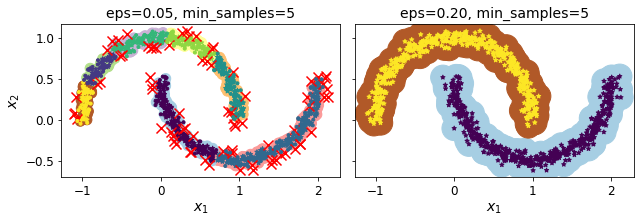

In [111]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig('dbscan_plot')
plt.show()

In [112]:
dbscan = dbscan2

In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [114]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [115]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

#### Figure 9-15. Decision boundary between two Clusters

Saving figure cluster_classification_plot


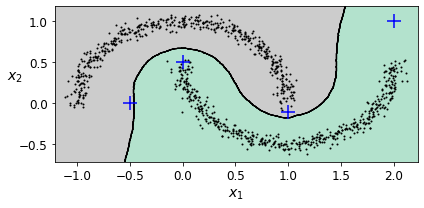

In [116]:
plt.figure(figsize=(6, 3))

plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c='b', marker='+', s=200, zorder=10)
save_fig('cluster_classification_plot')
plt.show()

In [117]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

# Other Clustering Alogorithms

## Spectral Clustering

In [118]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [119]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [120]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [121]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap='Paired')
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"RBF gamma={sc.gamma}", fontsize=14)

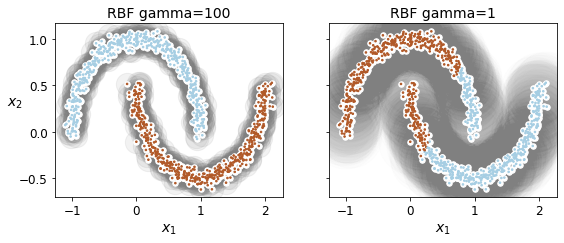

In [122]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

## Agglomerative Clustering

In [123]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage='complete').fit(X)

In [124]:
def learned_paramters(estimator):
    return [attrib for attrib in dir(estimator) if attrib.endswith("_") and not attrib.startswith("_")]

In [125]:
learned_paramters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [126]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# Gaussian Mixtures

In [127]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [128]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

EM algorithm estimated:

In [129]:
gm.weights_

array([0.39054348, 0.2093669 , 0.40008962])

In [130]:
gm.means_

array([[ 0.05224874,  0.07631976],
       [ 3.40196611,  1.05838748],
       [-1.40754214,  1.42716873]])

In [131]:
gm.covariances_

array([[[ 0.6890309 ,  0.79717058],
        [ 0.79717058,  1.21367348]],

       [[ 1.14296668, -0.03114176],
        [-0.03114176,  0.9545003 ]],

       [[ 0.63496849,  0.7298512 ],
        [ 0.7298512 ,  1.16112807]]])

In [132]:
# algorithms actually converge?
gm.converged_

True

In [133]:
# How many iterations
gm.n_iter_

4

In [134]:
# Hard Clustering
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [135]:
# Soft Clustering
gm.predict_proba(X)

array([[9.77227791e-01, 2.27715290e-02, 6.79898914e-07],
       [9.83288385e-01, 1.60345103e-02, 6.77104389e-04],
       [7.51824662e-05, 1.90251273e-06, 9.99922915e-01],
       ...,
       [4.35053542e-07, 9.99999565e-01, 2.17938894e-26],
       [5.27837047e-16, 1.00000000e+00, 1.50679490e-41],
       [2.32355608e-15, 1.00000000e+00, 8.21915701e-41]])

In [136]:
# generative model
X_new, y_new = gm.sample(6)
X_new

array([[-0.8690223 , -0.32680051],
       [ 0.29945755,  0.2841852 ],
       [ 1.85027284,  2.06556913],
       [ 3.98260019,  1.50041446],
       [ 3.82006355,  0.53143606],
       [-1.04015332,  0.7864941 ]])

In [137]:
y_new

array([0, 0, 1, 1, 1, 2])

In [138]:
gm.score_samples(X)

array([-2.60674489, -3.57074133, -3.33007348, ..., -3.51379355,
       -4.39643283, -3.8055665 ])

In [139]:
resolution = 100
grid = np.arange(-10, 10, 1 /resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999271592

#### Figure 9-17. 훈련된 GMM의 Cluster 평균, 결정 경계, 밀도 등고선

In [140]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12), linewidths=1, colors='k')
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, linewidths=2, colors='r', linestyles='dashed')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    
    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0, fontsize=14)
    else:
        plt.tick_params(labelleft=False)

Saving figure gaussian_mixtures_plot


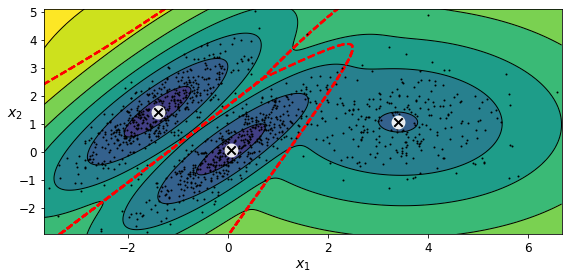

In [141]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig('gaussian_mixtures_plot')
plt.show()

covariance_type
- ```full(default)``` : 제약이 없습니다. 모든 클러스터가 어떤 크기의 타원도 될 수 있습니다.
- ```tied``` : 모든 클러스터가 동일하지만 어떤 타원도 가능합니다(즉, 공분산 행렬을 공유합니다).
- ```spherical``` : 모든 클러스터가 원형이지만 지름은 다를 수 있습니다(즉, 분산이 다릅니다).
- ```diag``` : 클러스터는 어떤 크기의 타원도 될 수 있지만 타원은 축에 나란해야 합니다(즉, 공분산 행렬이 대각 행렬입니다).

In [142]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type='full', random_state=42)
gm_full.fit(X)

gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type='tied', random_state=42)
gm_tied.fit(X)

gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type='spherical', random_state=42)
gm_spherical.fit(X)

gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type='diag', random_state=42)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

#### Figure 9-18. Tied Cluster(Upper Left) & Spherical Cluster(Upper Right) & Full Cluster(Lower Left) & Diag Cluster(Lower Right)

In [143]:
def compare_gaussian_mixtures(gm1, gm2, gm3, gm4, X):
    plt.figure(figsize=(16, 12))
    
    plt.subplot(221)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type={gm1.covariance_type}', fontsize=28)
    
    plt.subplot(222)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type={gm2.covariance_type}', fontsize=28)
    
    plt.subplot(223)
    plot_gaussian_mixture(gm3, X)
    plt.title(f'covariance_type={gm3.covariance_type}', fontsize=28)
    
    plt.subplot(224)
    plot_gaussian_mixture(gm4, X, show_ylabels=False)
    plt.title(f'covariance_type={gm4.covariance_type}', fontsize=28)

Saving figure covariance_type_plot


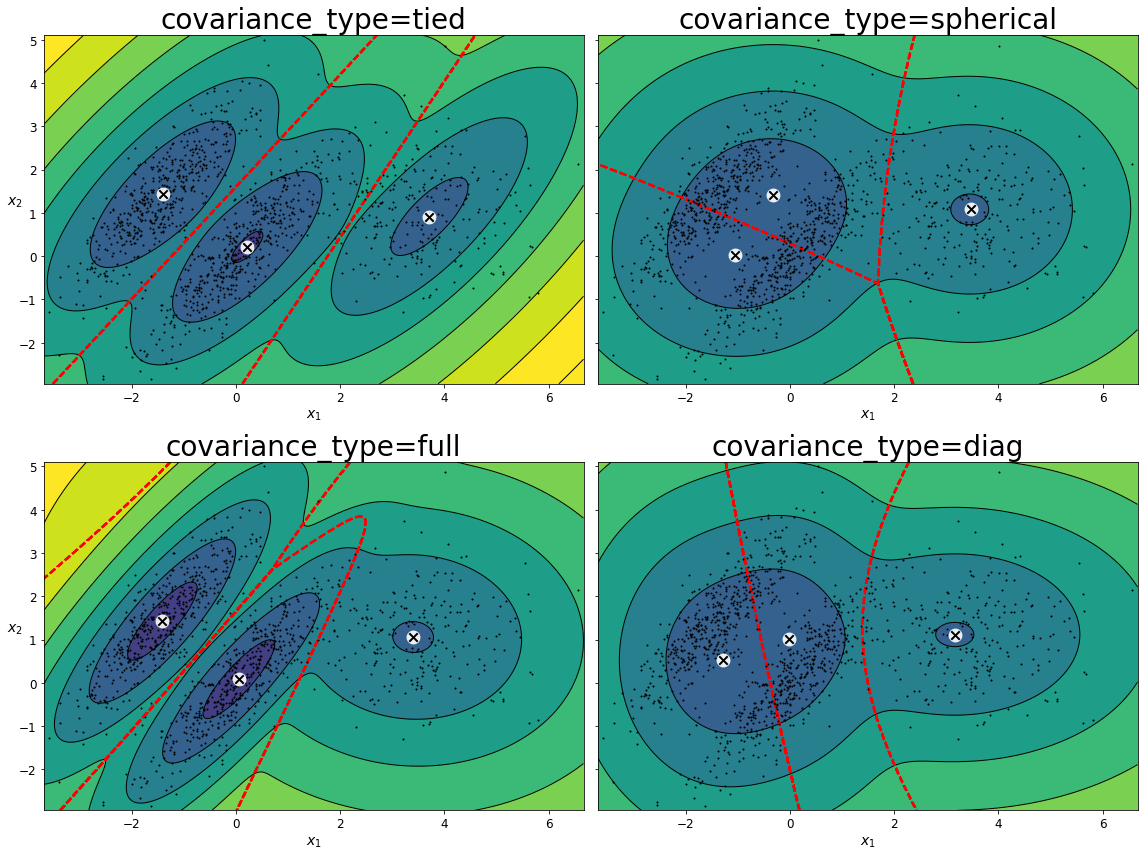

In [144]:
compare_gaussian_mixtures(gm_tied, gm_spherical, gm_full, gm_diag, X)

save_fig('covariance_type_plot')
plt.show()

## Anomaly Detection Using Gaussian Mixtures

GMM을 Anomaly Dectection에 적용할 수 있음  
Low Density인 지역에 있는 Sample을 Anomalies로 생각할 수 있음  
이 때, 사용할 Density Threshold을 정의해야함  
ex) 제조 회사에서 Detect Defective products 할 때, 결함제품의 비율이 4%라 하자  
이 때, 4%를 Density Threshold로 선택

In [145]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

#### Figure 9-19. GMM을 이용한 Outlier Detection

Saving figure mixture_anomaly_detection_plot


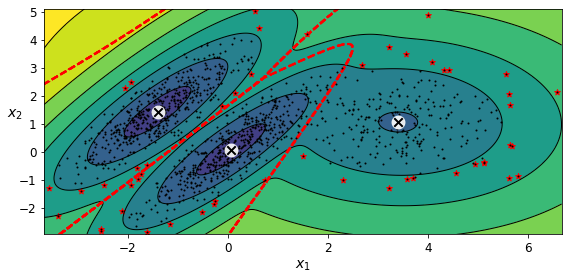

In [146]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='*')
plt.ylim(top=5.1)

save_fig('mixture_anomaly_detection_plot')
plt.show()

## Selecting the Number of Clusters

Inertia나 Silhouette score는 Cluster가 Shpherical하다고 가정  
GMM에서는 BIC(Bayesian Information Criterion)나 AIC(Akaike Information Criterion)를 사용    
${BIC} = {\log(m)p - 2\log({\hat L})}$  
${AIC} = 2p - 2\log(\hat L)$  
- $m$은 샘플의 개수
- $p$는 모델이 학습할 파라미터 개수
- $\hat L$은 모델의 가능도 함수의 최댓값. 모델과 최적의 파라미터가 주어졌을 때 관측 데이터의 $X$의 조건부 확률

In [147]:
gm.bic(X)

8189.662685850679

In [148]:
gm.aic(X)

8102.437405735641

In [149]:
# Manually compute BIC
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)

bic = np.log(len(X))*n_params - 2*max_log_likelihood
aic = 2*n_params - 2*max_log_likelihood

In [150]:
bic, aic

(8189.662685850679, 8102.437405735641)

In [151]:
n_params

17

Cluster마다 하나의 Weight가 있지만, Sum은 1이 되어야 함  
따라서 Degree of freedom은 하나 감소함  
비슷하게 $n \times n$ 공분산 행렬의 Degree of freedom은 $n^2$가 아닌 $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$임

In [152]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
            for k in range(1, 11)]

In [153]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

#### Figure 9-21. 여러가지 Cluster 개수 k에 대한 AIC와 BIC

Saving figure aic_bic_vs_k_plot


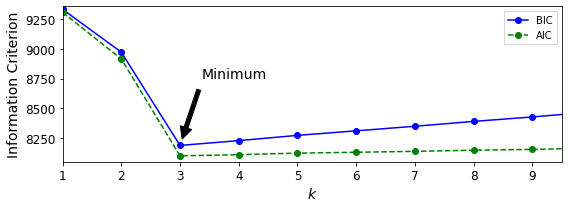

In [154]:
plt.figure(figsize=(8, 3))

plt.plot(range(1, 11), bics, 'bo-', label='BIC')
plt.plot(range(1, 11), aics, 'go--', label='AIC')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Information Criterion', fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
            xy=(3, bics[2]),
            xytext=(0.35, 0.6),
            textcoords='figure fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.1))
plt.legend()

save_fig('aic_bic_vs_k_plot')
plt.show()

In [155]:
# Best of the number of Cluster & covariance_type
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ('full', 'tied', 'spherical', 'diag'):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [156]:
best_k

3

In [157]:
best_covariance_type

'full'

# Bayesian Gaussian Mixture Models

Best of the number of Cluster & covariance type를 수동으로 찾는 대신
```BayesianGaussianMixture```을 사용하여 불필요한 Cluster의 Weights를 0으로 만듦  
최적의 클러스터 개수보다 큰 Component 개수를 지정하면 됨

In [158]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

C:\Users\82104\AppData\Roaming\Python\Python38\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [159]:
np.round(bgm.weights_, 2)

array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

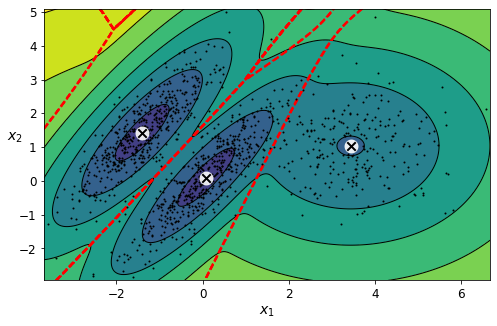

In [160]:
plt.figure(figsize=(8, 5))

plot_gaussian_mixture(bgm, X)
plt.show()

In [161]:
nn = 73

bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                 weight_concentration_prior=0.01, random_state=42)
bgm_low.fit(X[:nn])

bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [162]:
np.round(bgm_low.weights_, 2)

array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [163]:
np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01])

Saving figure mixture_concentration_prior_plot


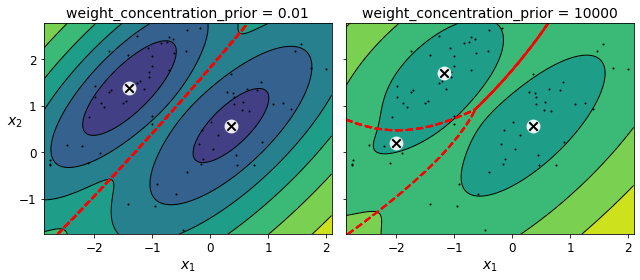

In [164]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title('weight_concentration_prior = 0.01', fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title('weight_concentration_prior = 10000', fontsize=14)

save_fig('mixture_concentration_prior_plot')
plt.show()

In [165]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [166]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

Saving figure moons_vs_bgm_plot


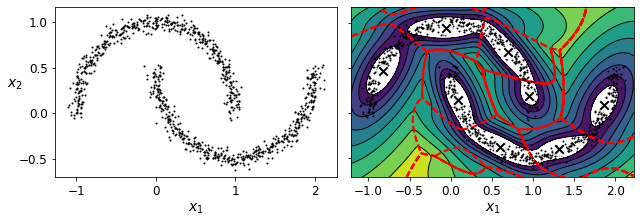

In [167]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', rotation=0, fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig('moons_vs_bgm_plot')
plt.show()

Not great.  
반달 모양의 Cluster 2개를 감지하는 대신 타원 모양의 Cluster 8개로 감지함 

#### Likelohood Function

In [168]:
from scipy.stats import norm

xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2*norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:, np.newaxis] / (xx[1] - xx[0])

Saving figure likelihood_function_plot


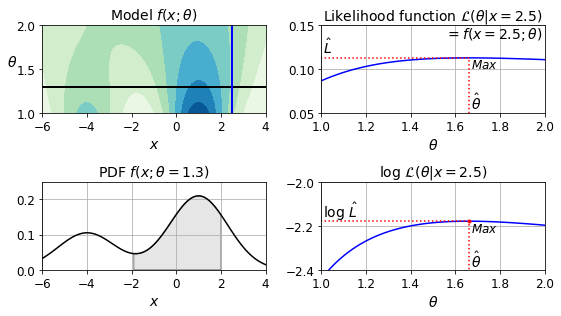

In [169]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap='GnBu')
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], 'k-', linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$\theta$', rotation=0, fontsize=14)
plt.title(r'Model $f(x; \theta)$', fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], 'b-')
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], 'r:')
plt.plot([0, ss[max_idx]], [max_val, max_val], 'r:')
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx] + 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx] + 0.01, max_val - 0.012, r'$Max$', fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r'$\theta$', fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha='right')
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], 'k-')
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), 'b-')
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, 'r.')
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], 'r:')
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r'$\theta$', fontsize=14)
plt.text(ss[max_idx] + 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx] + 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

save_fig('likelihood_function_plot')
plt.show()